# Лабораторная работа 2 Задача классификации. Последовательная нейронная сеть. Зухир Амира Саидовна

In [1]:
%pip install pandas matplotlib tensorflow numpy scikit-learn setuptools distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings('ignore')

# Загрузка данных и вывод различных параметров

In [3]:
wine_data = load_wine()
x_data, y_data = wine_data['data'], wine_data['target']

print(f'Размерность x_data: {x_data.shape}')
print(f'Размерность y_data: {y_data.shape}')
print(f'Данные по первому вину: {x_data[0]}')
print(f'Класс вина: {y_data[0]}')

Размерность x_data: (178, 13)
Размерность y_data: (178,)
Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


# Преобразование меток классов в формат one-hot encoding

In [4]:
y_data = utils.to_categorical(y_data, 3)

# Разделение данных на тренировочную, проверочную и тестовую выборки

In [5]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=6, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, random_state=6, shuffle=True)
print(f'Размерность x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'Размерность x_val: {x_val.shape}, y_val: {y_val.shape}')
print(f'Размерность x_test: {x_test.shape}, y_test: {y_test.shape}')

Размерность x_train: (144, 13), y_train: (144, 3)
Размерность x_val: (16, 13), y_val: (16, 3)
Размерность x_test: (18, 13), y_test: (18, 3)


# Построение последовательной модели нейронной сети

In [6]:
model = Sequential([
    Dense(100, input_dim=x_train.shape[1], activation='relu'),
    Dense(50, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,993 (27.32 KB)

 Trainable params: 6,993 (27.32 KB)

 Non-trainable params: 0 (0.00 B)

# Компиляция модели. Обучение модели

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3000, batch_size=32)

Epoch 1/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.3478 - loss: 37.4069 - val_accuracy: 0.2500 - val_loss: 19.3627
Epoch 2/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3461 - loss: 16.1697 - val_accuracy: 0.2500 - val_loss: 8.9246
Epoch 3/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3653 - loss: 6.5606 - val_accuracy: 0.3750 - val_loss: 1.3045
Epoch 4/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3406 - loss: 3.3835 - val_accuracy: 0.3125 - val_loss: 1.1008
Epoch 5/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3764 - loss: 2.4431 - val_accuracy: 0.3750 - val_loss: 1.0954
Epoch 6/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2711 - loss: 2.3116 - val_accuracy: 0.3750 - val_loss: 1.0952
Epoch 7/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2883 - loss: 2.7808 - val_accuracy: 0.3750 - val_loss: 1.0950
Epoch 8/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3058 - loss: 1.9165 - val_accuracy: 0.3750 

# График обучения (точность)

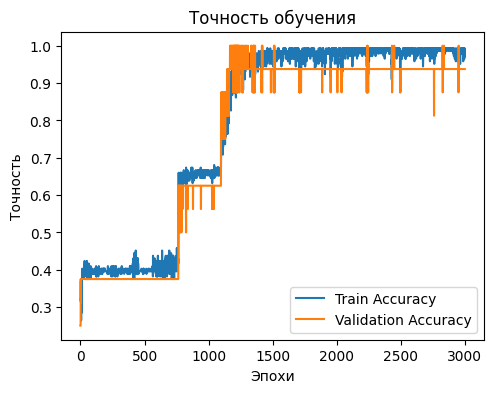

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

# График обучения (потери)

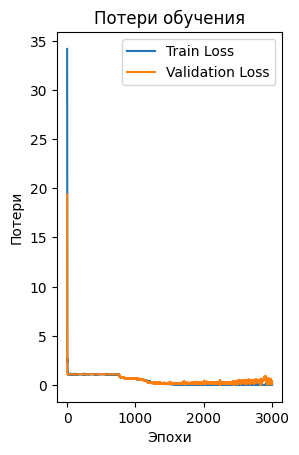

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Потери обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

# Оценка модели на тестовой выборке

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точность на тестовой выборке: {test_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9444 - loss: 0.1315
Точность на тестовой выборке: 94.44%


# Прогнозирование классов на тестовой выборке

In [11]:
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


# Вывод результатов

In [12]:
for i in range(len(x_test)):
    print(f'Предсказано: {predictions[i]}, Ожидалось: {y_test_labels[i]}, Верно: {predictions[i] == y_test_labels[i]}')
print(f'\nПроцент верных предсказаний: {(predictions == y_test_labels).mean() * 100:.2f}%')

Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 2, Ожидалось: 2, Верно: True
Предсказано: 1, Ожидалось: 0, Верно: False
Предсказано: 1, Ожидалось: 1, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True
Предсказано: 0, Ожидалось: 0, Верно: True

Процент верных предсказаний: 94.44%
